# **DIMENSIONALITY REDUCTION**

 Many machine learning problems involve thousands or even millions of
 features for each training instance. Not only do all these features make
 training extremely slow, but they can also make it much harder to find a
 good solution, as you will see. This problem is often referred to as the curse
 of dimensionality.
 

#### ***WARNING:***

Reducing dimensionality does cause some information loss, just like compressing an
 image to JPEG can degrade its quality, so even though it will speed up training, it may
 make your system perform slightly worse. It also makes your pipelines a bit more
 complex and thus harder to maintain. Therefore, I recommend you first try to train your
 system with the original data before considering using dimensionality reduction. In
 some cases, reducing the dimensionality of the training data may filter out some noise
 and unnecessary details and thus result in higher performance, but in general it won’t; it
 will just speed up training.


Apart from speeding up training, dimensionality reduction is also extremely
 useful for data visualization. Reducing the number of dimensions down to
 two (or three) makes it possible to plot a condensed view of a high
dimensional training set on a graph and often gain some important insights
 by visually detecting patterns, such as clusters. Moreover, data visualization
 is essential to communicate your conclusions to people who are not data
 scientists—in particular, decision makers who will use your results.

 In this chapter we will first discuss the curse of dimensionality and get a
 sense of what goes on in high-dimensional space. Then we will consider the
 two main approaches to dimensionality reduction (***projection*** and ***manifold***
 learning), and we will go through three of the most popular dimensionality
 reduction techniques: ***PCA***, ***random*** ***projection***, and ***locally*** ***linear***
 ***embedding*** ***(LLE)***.

## **The Curse of Dimensionality**

We are so used to living in three dimensions  that our intuition fails us
 when we try to imagine a high-dimensional space. Even a basic 4D
 hypercube is incredibly hard to picture in our minds, let
 alone a 200-dimensional ellipsoid bent in a 1,000-dimensional space.

 It turns out that many things behave very differently in high-dimensional
 space. For example, if you pick a random point in a unit square (a 1 × 1
 square), it will have only about a 0.4% chance of being located less than
0.001 from a border (in other words, it is very unlikely that a random point
 will be “extreme” along any dimension). But in a 10,000-dimensional unit
 hypercube, this probability is greater than 99.999999%. Most points in a
 high-dimensional hypercube are very close to the border. 

 high-dimensional datasets are at risk of being very sparse: most
 training instances are likely to be far away from each other. This also means
 that a new instance will likely be far away from any training instance,
 making predictions much less reliable than in lower dimensions, since they
 will be based on much larger extrapolations. In short, the more dimensions
 the training set has, the greater the risk of overfitting it.

 In theory, one solution to the curse of dimensionality could be to increase
 the size of the training set to reach a sufficient density of training instances.
 Unfortunately, in practice, the number of training instances required to
 reach a given density grows exponentially with the number of dimensions.
 With just 100 features—significantly fewer than in the MNIST problem—
 all ranging from 0 to 1, you would need more training instances than atoms
 in the observable universe in order for training instances to be within 0.1 of
 each other on average, assuming they were spread out uniformly across all
 dimensions.


## **Main Approches for Dimensionality Reduction**

Before we dive into specific dimensionality reduction algorithms, let’s take
 a look at the two main approaches to reducing dimensionality: projection
 and manifold learning.

### **Projection**

 In most real-world problems, training instances are not spread out
 uniformly across all dimensions. Many features are almost constant, while
 others are highly correlated (as discussed earlier for MNIST). As a result,
 all training instances lie within (or close to) a much lower-dimensional
 subspace of the high-dimensional space.

> ##### ***Consider an Example from the Book***

### **Manifold Learning**

However, projection is not always the best approach to dimensionality
 reduction. In many cases the subspace may twist and turn

> ##### ***Consider a Swiss roll Example from the Book***

Many dimensionality reduction algorithms work by modeling the manifold
 on which the training instances lie; this is called manifold learning. It relies
 on the manifold assumption, also called the manifold hypothesis, which
 holds that most real-world high-dimensional datasets lie close to a much
 lower-dimensional manifold. This assumption is very often empirically
 observed.

 The manifold assumption is often accompanied by another implicit
 assumption: that the task at hand (e.g., classification or regression) will be
 simpler if expressed in the lower-dimensional space of the manifold.

 In short, reducing the dimensionality of your training set before training a
 model will usually speed up training, but it may not always lead to a better
 or simpler solution; it all depends on the dataset.
 Hopefully you now have a good sense of what the curse of dimensionality
 is and how dimensionality reduction algorithms can fight it, especially
 when the manifold assumption holds. The rest of this chapter will go
 through some of the most popular algorithms for dimensionality reduction.

## **PCA**

*Principal component analysis* (PCA) is by far the most popular dimensionality reduction algorithm. First it identify the hyperplane that lies closest to the data, and then it projects the data onto it.

### **Preserving the Variance**

Before you can project the training set onto a lower-dimensional
 hyperplane, you first need to choose the right hyperplane.

 It seems reasonable to select the axis that preserves the maximum amount
 of variance, as it will most likely lose less information than the other
 projections. Another way to justify this choice is that it is the axis that
 minimizes the mean squared distance between the original dataset and its
 projection onto that axis. This is the rather simple idea behind PCA.

### **Principal Components**

 PCA identifies the axis that accounts for the largest amount of variance in
 the training set. If it were a higher-dimensional dataset, PCA would also find a third
 axis, orthogonal to both previous axes, and a fourth, a fifth, and so on—as
 many axes as the number of dimensions in the dataset.

The i<sub>th</sub> axis is called the i<sub>th</sub> *principal component* (PC) of the data.

#### **NOTE:**
 For each principal component, PCA finds a zero-centered unit vector pointing in the
 direction of the PC. Since two opposing unit vectors lie on the same axis, the direction
 of the unit vectors returned by PCA is not stable: if you perturb the training set slightly
 and run PCA again, the unit vectors may point in the opposite direction as the original
 vectors. However, they will generally still lie on the same axes. In some cases, a pair of
 unit vectors may even rotate or swap (if the variances along these two axes are very
 close), but the plane they define will generally remain the same.

 So how can you find the principal components of a training set? Luckily,
 there is a standard matrix factorization technique called ***singular value decomposition*** (SVD) that can decompose the training set matrix X into the
 matrix multiplication of three matrices **U Σ V<sup>T</sup>**, Where **V** contains the unit vector that define all the principal components that you ar looking for, as shown In the Equation below.

###### ***Equation for Principal Components Matrix***
**V = (C<sub>1</sub> C<sub>2</sub> ... C<sub>n</sub>)**

 The following Python code uses NumPy’s svd() function to obtain all the
 principal components of the 3D training set represented in Figure 8-2, then
 it extracts the two unit vectors that define the first two PCs:

>#### Consider Figure 8-2 from the Book Chapter: 8

In [1]:
import numpy as np

np.random.seed(50)
X = np.random.randn(1000, 3)
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

#### **WARNING:**
 PCA assumes that the dataset is centered around the origin. As you will see, Scikit
Learn’s PCA classes take care of centering the data for you. If you implement PCA
 yourself (as in the preceding example), or if you use other libraries, don’t forget to
 center the data first.

### **Projecting Down to d Dimensions**

 Once you have identified all the principal components, you can reduce the
 dimensionality of the dataset down to d dimensions by projecting it onto the
 hyperplane defined by the first d principal components. Selecting this
 hyperplane ensures that the projection will preserve as much variance as
 possible.

To project the training set onto the hyperplane and obtain a reduced dataset
 **X**<sub>*d-proj*</sub> of dimensionality *d*, compute the matrix multiplication of the training set matrix **X** by the matrix **W**<sub>*d*</sub>, defined as the matrix containing the first *d* columns of **V**, as shown in Equation below.

###### ***Equation: Prijecting the training set down to d dimensions***

**X**<sub>*d-proj*</sub> = **XW**<sub>*d*</sub>

The following Python code projects the training set onto the plane defined
 by the first two principal components:

In [2]:
W2 = Vt[:2].T
X2D = X_centered @ W2 

 There you have it! You now know how to reduce the dimensionality of any
 dataset by projecting it down to any number of dimensions, while
 preserving as much variance as possible.

### **Using Scikit-Learn**

 Scikit-Learn’s PCA class uses SVD to implement PCA, just like we did
 earlier in this chapter. The following code applies PCA to reduce the
 dimensionality of the dataset down to two dimensions (note that it
 automatically takes care of centering the data):

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
pca.components_

array([[-0.25416046,  0.6020987 ,  0.75688811],
       [ 0.33501973,  0.78894429, -0.51510066]])

After fitting the PCA transformer to the dataset, its *components_* attribute holds the transpose of **W**<sub>d</sub>: it contains one row for each of the forst *d* principal components

### **Explained Variance Ratio**

Another useful piece of information is the *explained variance ratio* of each principal component, available via the ***explained_variance_ratio_*** variable. the ratio indicates the proportion of the dataset's variance that lies along each principal component. For example, let's look at the explained above.

In [4]:
pca.explained_variance_ratio_

array([0.340847  , 0.33605382])

This output tells us that about 34% of the dataset's variance lies along the first PC, and about 34% lies along the second PC. This leaves about 32% for the third PC, so its reasonable to assume that the third PC probably carries equally information

### **Choosing the Right Number of Dimensions**

 Instead of arbitrarily choosing the number of dimensions to reduce down to,
 it is simpler to choose the number of dimensions that add up to a
 sufficiently large portion of the variance—say, 95% (An exception to this
 rule, of course, is if you are reducing dimensionality for data visualization,
 in which case you will want to reduce the dimensionality down to 2 or 3).

 The following code loads and splits the MNIST dataset (introduced in
 Chapter 3) and performs PCA without reducing dimensionality, then
 computes the minimum number of dimensions required to preserve 95% of
 the training set’s variance:

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)
x_train, y_train = mnist.data[:60_000], mnist.target[:60_000]
x_test, y_test = mnist.data[60_000:], mnist.target[60_000:]

pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1 # d equals to 154

You could then set n_components=d and run PCA again, but there’s a
 better option. Instead of specifying the number of principal components you
 want to preserve, you can set n_components to be a float between 0.0
 and 1.0, indicating the ratio of variance you wish to preserve:

In [6]:

pca = PCA(n_components=0.95)
x_reduced =pca.fit_transform(x_train)

 The actual number of components is determined during training, and it is
 stored in the n_components_ attribute:

In [7]:
pca.n_components_

154

 Yet another option is to plot the explained variance as a function of the
 number of dimensions. There will
 usually be an elbow in the curve, where the explained variance stops
 growing fast. In this case, you can see that reducing the dimensionality
 down to about 100 dimensions wouldn’t lose too much explained variance.


Text(0, 0.5, 'Explained Variance')

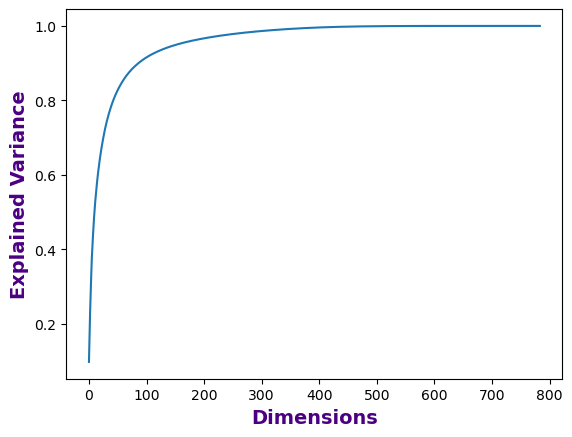

In [8]:
import matplotlib.pyplot as plt

plt.plot(cumsum, label='Elbow')
plt.xlabel("Dimensions", fontsize=14, color='indigo', fontweight='bold')
plt.ylabel("Explained Variance", fontsize=14, color='indigo', fontweight='bold')

 Lastly, if you are using dimensionality reduction as a preprocessing step for
 a supervised learning task (e.g., classification), then you can tune the
 number of dimensions as you would any other hyperparameter (see
 Chapter 2). For example, the following code example creates a two-step
 pipeline, first reducing dimensionality using PCA, then classifying using a
 random forest. Next, it uses RandomizedSearchCV to find a good
 combination of hyperparameters for both PCA and the random forest
 classifier. This example does a quick search, tuning only 2 hyperparameters,
 training on just 1,000 instances, and running for just 10 iterations, but feel
 free to do a more thorough search if you have the time:

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=50),
                    RandomForestClassifier(random_state=50))
param_distrib = {
    "pca__n_components": np.arange(10, 80), 
    "randomforestclassifier__n_estimators": np.arange(50, 500)
    }
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=50)
rnd_search.fit(x_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=50)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=50))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=50)

In [10]:
"""Let's look at the best hyperparameters found:"""
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 212, 'pca__n_components': 28}


 It’s interesting to note how low the optimal number of components is: we
 reduced a 784-dimensional dataset to just 28 dimensions! This is tied to the
 fact that we used a random forest, which is a pretty powerful model. If we
 used a linear model instead, such as an SGDClassifier, the search
 would find that we need to preserve more dimensions (about 69).

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf = make_pipeline(PCA(random_state=50),
                    SGDClassifier(random_state=50))
param_distrib = {
    "pca__n_components": np.arange(10, 80), 
    "sgdclassifier__max_iter": np.arange(50, 500)
    }
rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=50)
rnd_search.fit(x_train[:1000], y_train[:1000])

d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
d:\CONTENTS\APPLICATIONS\New Folder\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
d:\CONTENTS\APPL

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=50)),
                                             ('sgdclassifier',
                                              SGDClassifier(random_state=50))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=50)

In [12]:
"""Let's look at the best hyperparameters found:"""
print(rnd_search.best_params_)

{'sgdclassifier__max_iter': 90, 'pca__n_components': 69}


### **PCA for Compression**

 After dimensionality reduction, the training set takes up much less space.
 For example, after applying PCA to the MNIST dataset while preserving
 95% of its variance, we are left with 154 features, instead of the original
 784 features. So the dataset is now less than 20% of its original size, and we
 only lost 5% of its variance! This is a reasonable compression ratio, and it’s
 easy to see how such a size reduction would speed up a classification
 algorithm tremendously.

 It is also possible to decompress the reduced dataset back to 784
 dimensions by applying the inverse transformation of the PCA projection.
 This won’t give you back the original data, since the projection lost a bit of
 information (within the 5% variance that was dropped), but it will likely be
 close to the original data.

The mean squared distance between the original
 data and the reconstructed data (compressed and then decompressed) is
 called the ***reconstruction error***.

 The *inverse_transform()* method lets us decompress the reduced
 MNIST dataset back to 784 dimensions:


In [13]:
x_recovered = pca.inverse_transform(x_reduced)

> ##### ***Consider an example from the book....***

##### **Equation:** ***PCA inverse transformation, back to the original of dimensions.***
**X**<sub>recovered</sub> = **X**<sub>d-drop</sub>**W**<sub>d</sub><sup>T</sup>

### **Randomized PCA**

 If you set the *svd_solver* hyperparameter to "*randomized*", Scikit
Learn uses a stochastic algorithm called ***randomized PCA*** that quickly finds
 an approximation of the first d principal components. Its computational
 complexity is O(m × d<sup>2</sup>) + O(d<sup>3</sup>), instead of O(m × n<sup>2</sup>) + O(n<sup>3</sup>) for the full
 SVD approach, so it is dramatically faster than full SVD when d is much
 smaller than n:

In [14]:
rnd_pca = PCA(n_components=154, svd_solver='randomized', random_state=50)
x_reduced = rnd_pca.fit_transform(x_train)

>#### **TIP:**
 By default, svd_solver is actually set to "auto": Scikit-Learn automatically uses
 the randomized PCA algorithm if max(m, n) > 500 and n_components is an integer
 smaller than 80% of min(m, n), or else it uses the full SVD approach. So the preceding
 code would use the randomized PCA algorithm even if you removed the
 svd_solver="randomized" argument, since 154 < 0.8 × 784. If you want to force
 Scikit-Learn to use full SVD for a slightly more precise result, you can set the
 svd_solver hyperparameter to "***full***".

### **Incremental PCA**

 One problem with the preceding implementations of PCA is that they
 require the whole training set to fit in memory in order for the algorithm to
 run. Fortunately, incremental PCA (IPCA) algorithms have been developed
 that allow you to split the training set into mini-batches and feed these in
 one mini-batch at a time. This is useful for large training sets and for
 applying PCA online (i.e., on the fly, as new instances arrive).

 The following code splits the MNIST training set into 100 mini-batches
 (using NumPy’s array_split() function) and feeds them to Scikit
Learn’s IncrementalPCA class  to reduce the dimensionality of the
 MNIST dataset down to 154 dimensions, just like before. Note that you
 must call the partial_fit() method with each mini-batch, rather than
 the fit() method with the whole training set:

In [15]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for x_batch in np.array_split(x_train, n_batches):
    inc_pca.partial_fit(x_batch)
    
x_reduced = inc_pca.transform(x_train)

Alternatively, you can use NumPy’s memmap class, which allows you to
 manipulate a large array stored in a binary file on disk as if it were entirely
 in memory; the class loads only the data it needs in memory, when it needs
 it.

To demonstrate this, let’s first create a memory-mapped (memmap) file
 and copy the MNIST training set to it, then call flush() to ensure that
 any data still in the cache gets saved to disk. In real life, X_train would
 typically not fit in memory, so you would load it chunk by chunk and save
 each chunk to the right part of the memmap array:

In [16]:
filename = "C:/Users/jacks/Documents/Datasets/my_mnist.mmap"
x_mmap = np.memmap(filename, dtype='float32', mode="write", shape=x_train.shape)
x_mmap[:] = x_train # could be a loop instead, saving the data chunk by chunk
x_mmap.flush()

 Next, we can load the memmap file and use it like a regular NumPy array.
 Let’s use the IncrementalPCA class to reduce its dimensionality. Since
 this algorithm uses only a small part of the array at any given time, memory
 usage remains under control. This makes it possible to call the usual fit()
 method instead of partial_fit(), which is quite convenient:

In [17]:
x_mmap = np.memmap(filename, dtype='float32', mode='readonly').reshape(-1, 784)
batch_size = x_mmap.shape[0] // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(x_mmap)

IncrementalPCA(batch_size=600, n_components=154)

>#### WARNING:
Only the raw binary data is saved to disk, so you need to specify the data type and shapeof the array when you load it. If you omit the shape, *np.memmap()* returns a 1D array.

 For very high-dimensional datasets, PCA can be too slow. As you saw
 earlier, even if you use randomized PCA its computational complexity is
 still O(m × d<sup>2</sup>) + O(d<sup>3</sup>), so the target number of dimensions d must not be
 3
too large. If you are dealing with a dataset with tens of thousands of
 features or more (e.g., images), then training may become much too slow:
 in this case, you should consider using random projection instead.

## **Random Projection**

As its name suggests, the random projection algorithm projects the data to a
 lower-dimensional space using a random linear projection. This may sound
 crazy, but it turns out that such a random projection is actually very likely to
 preserve distances fairly well, as was demonstrated mathematically by
 William B. Johnson and Joram Lindenstrauss in a famous lemma. So, two
 similar instances will remain similar after the projection, and two very
 different instances will remain very different.

Obviously, the more dimensions you drop, the more information is lost, and
 the more distances get distorted. So how can you choose the optimal
 number of dimensions? Well, Johnson and Lindenstrauss came up with an
 equation that determines the minimum number of dimensions to preserve in
 order to ensure—with high probability—that distances won’t change by
 more than a given tolerance.

 For example, if you have a dataset containing
 m = 5,000 instances with n = 20,000 features each, and you don’t want the
 squared distance between any two instances to change by more than ε =
 10%, then you should project the data down to d dimensions, with ***d ≥ 4log(m) / (½ ε² - ⅓ ε³)***, which is 7,300 dimensions. That’s quite a significant
 dimensionality reduction! Notice that the equation does not use n, it only
 relies on m and ε. This equation is implemented by the
 *johnson_lindenstrauss_min_dim()* function:

In [18]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

m, ε = 5_000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=ε)
d

7300

Now we can just generate a random matrix P of shape [d, n], where each
 item is sampled randomly from a Gaussian distribution with mean 0 and
 variance 1 / d, and use it to project a dataset from n dimensions down to d:

In [ ]:
n = 20_000
np.random.seed(50)
p = np.random.randn(d, n) / np.sqrt(d) # std dev = square root of variance.

x = np.random.randn(m, n) # generate a fake dataset
x_reduced = x @ p.T

 That’s all there is to it! It’s simple and efficient, and no training is required:
 the only thing the algorithm needs to create the random matrix is the
 dataset’s shape. The data itself is not used at all.

 Scikit-Learn offers a GaussianRandomProjection class to do exactly
 what we just did: when you call its fit() method, it uses
 johnson_lindenstrauss_min_dim() to determine the output
 dimensionality, then it generates a random matrix, which it stores in the
 components_ attribute. Then when you call transform(), it uses this
 matrix to perform the projection. When creating the transformer, you can
 set eps if you want to tweak ε (it defaults to 0.1), and n_components if
 you want to force a specific target dimensionality d. The following code
 example gives the same result as the preceding code (you can also verify
 that gaussian_rnd_proj.components_ is equal to P):

In [25]:
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=ε, random_state=50)
x_reduced = gaussian_rnd_proj.fit_transform(x) # same result  as above.
len(gaussian_rnd_proj.components_)

7300

 Scikit-Learn also provides a second random projection transformer, known
 as SparseRandomProjection. It determines the target dimensionality
 in the same way, generates a random matrix of the same shape, and
 performs the projection identically. The main difference is that the random
matrix is sparse. This means it uses much less memory: about 25 MB
 instead of almost 1.2 GB in the preceding example! And it’s also much
 faster, both to generate the random matrix and to reduce dimensionality:
 about 50% faster in this case. Moreover, if the input is sparse, the
 transformation keeps it sparse (unless you set dense_output=True).

 Lastly, it enjoys the same distance-preserving property as the previous
 approach, and the quality of the dimensionality reduction is comparable. In
 short, it’s usually preferable to use this transformer instead of the first one,
 especially for large or sparse datasets.

 The ratio r of nonzero items in the sparse random matrix is called its
 density. By default, it is equal to 
1/√
 n
 . With 20,000 features, this means
 that only 1 in ~141 cells in the random matrix is nonzero: that’s quite
 sparse! You can set the density hyperparameter to another value if you
 prefer. Each cell in the sparse random matrix has a probability r of being
 nonzero, and each nonzero value is either –v or +v (both equally likely),
 where v = 1/√dr.

 If you want to perform the inverse transform, you first need to compute the
 pseudo-inverse of the components matrix using SciPy’s pinv() function,
 then multiply the reduced data by the transpose of the pseudo-inverse:

In [26]:
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)
x_recovered = x_reduced @ components_pinv.T

#### **WARNING:**
 Computing the pseudo-inverse may take a very long time if the components matrix is
 large, as the computational complexity of pinv() is O(dn²) if d < n, or O(nd²)
 otherwise.

 In summary, random projection is a simple, fast, memory-efficient, and
 surprisingly powerful dimensionality reduction algorithm that you should
 keep in mind, especially when you deal with high-dimensional datasets.


#### **NOTE:**
 Random projection is not always used to reduce the dimensionality of large datasets. For
 example, a 2017 paper  by Sanjoy Dasgupta et al. showed that the brain of a fruit fly
 implements an analog of random projection to map dense low-dimensional olfactory
 inputs to sparse high-dimensional binary outputs: for each odor, only a small fraction of
 the output neurons get activated, but similar odors activate many of the same neurons.
 This is similar to a well-known algorithm called locality sensitive hashing (LSH), which
 is typically used in search engines to group similar documents.

## **LLE**


***Locally linear embedding (LLE)***  is a nonlinear dimensionality reduction
 (NLDR) technique. It is a manifold learning technique that does not rely on
 projections, unlike PCA and random projection. In a nutshell, LLE works
 by first measuring how each training instance linearly relates to its nearest
 neighbors, and then looking for a low-dimensional representation of the
 training set where these local relationships are best preserved (more details
 shortly). This approach makes it particularly good at unrolling twisted
 manifolds, especially when there is not too much noise.

 The following code makes a Swiss roll, then uses Scikit-Learn’s
 LocallyLinearEmbedding class to unroll it:

In [29]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

x_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=50)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=50)
x_unrolled = lle.fit_transform(x_swiss)

 The variable t is a 1D NumPy array containing the position of each
 instance along the rolled axis of the Swiss roll. We don’t use it in this
 example, but it can be used as a target for a nonlinear regression task.


The resulting 2D dataset.The Swissroll is completely unrolled, and the distances between instances are locally
 well preserved. However, distances are not preserved on a larger scale: the
 unrolled Swiss roll should be a rectangle, not this kind of stretched and
 twisted band. Nevertheless, LLE did a pretty good job of modeling the
 manifold.

 Here’s how LLE works: for each training instance x<sup>(i)</sup> , the algorithm
 identifies its k-nearest neighbors (in the preceding code k = 10), then tries to
 reconstruct x<sup>(i)</sup> as a linear function of these neighbors. More specifically, it tries to find the weights w<sub>*i,j*</sub> such that the squared distance between x<sup>(i)</sup> and ***∑<sup>m</sup><sub>j=1</sub> w<sub>i,j</sub>X<sup>(i)</sup>***
 is as small as possible, assuming w<sub>i,j</sub> = 0 if **x**<sup>(i)</sup> is not one of
 the k-nearest neighbors of **x**<sup>(i)</sup> .Thus the first step of LLE is the constrained
 optimization problem described in Equation below, where **W** is the weight
 matrix containing all the weights w<sub>i,j</sub> . The second constraint simply
 normalizes the weights for each training instance x<sup>(i)</sup>.

> ##### **Equation: ***LLE step1, linear modeling local ralationships***
**W** = argmin<sub>w</sub> ∑<sup>m</sup><sub>i=1</sub> ( **X**<sup>(i)</sup> - ∑<sup>m</sup><sub>j=1</sub>*w*<sub>i,j</sub>**X**<sup>(j)</sup>)<sup>2</sup>

After this step the weight matrix **W** (Containing the weights w<sub>i,j</sub>)encodes
 the local linear relationships between the training instances. The second
 step is to map the training instances into a d-dimensional space (where d <
 n) while preserving these local relationships as much as possible. If **Z**<sup>(i)</sup> is the image of **X**<sup>(i)</sup> inthis d-dimensional space, then we want the squared distance between **Z**<sup>(i)</sup> and ∑<sup>m</sup><sub>j=1</sub> w<sub>i,j</sub>**Z**<sup>(j)</sup> to be as small as possible. This idea leads to the unconstrained optimization problem discribed in the below Equation.  It looks very similar to the first step, but instead of keeping the instances
 fixed and finding the optimal weights, we are doing the reverse: keeping the
 weights fixed and finding the optimal position of the instances’ images in
 the low-dimensional space. Note that **Z** is the matrix containing all **z**<sub>(i)</sub>.

> ##### ***Equation: LLE step 2,  reducing dimensionality while preserving relationships***
> **Z** = argmin<sub>**z**</sub> **∑**<sup>*m*</sup><sub>*i=1*</sub> ( **Z**<sup>*(i)</sup> - **∑**<sup>*m*</sup><sub>*j=1*</sub> *w<sub>i,j</sub>**Z**<sup>*(j)</sup>*)<SUP>2</SUP>

 Scikit-Learn’s LLE implementation has the following computational
 complexity: O(m log(m)n log(k)) for finding the k-nearest neighbors,
 O(mnk<sup>3</sup>) for optimizing the weights, and O(dm<sup>2</sup>) for constructing the low
dimensional representations. Unfortunately, the m<sup>2</sup> in the last term makes
 this algorithm scale poorly to very large datasets.
 As you can see, LLE is quite different from the projection techniques, and
 it’s significantly more complex, but it can also construct much better low
dimensional representations, especially if the data is nonlinear.


## **Other Dimensionality Reduction Techniques**
 Before we conclude this chapter, let’s take a quick look at a few other
 popular dimensionality reduction techniques available in Scikit-Learn:
 - ***sklearn.manifold.MDS***
Multidimensional scaling (MDS) reduces dimensionality while trying to preserve the distance between the instances. Random projection does that for high-dimensional data, but it doesn't work well on low-dimensional data.

- ***sklearn.manifold.isomap***
Isomap creates a graph by connecting each instance to its nearest
neighbors, then reduces dimensionality while trying to preserve the
geodesic distances between the instances. The geodesic distance
between two nodes in a graph is the number of nodes on the shortest
path between these nodes.

- ***sklearn.manifold.TSNE***
   t-distributed stochastic neighbor embedding (t-SNE) reduces
 dimensionality while trying to keep similar instances close and
 dissimilar instances apart. It is mostly used for visualization, in
 particular to visualize clusters of instances in high-dimensional space.
 For example, in the exercises at the end of this chapter you will use t
SNE to visualize a 2D map of the MNIST images.

- ***sklearn.discriminant_analysis.LinearDiscriminantAnalysis***
   Linear discriminant analysis (LDA) is a linear classification algorithm
 that, during training, learns the most discriminative axes between the
 classes. These axes can then be used to define a hyperplane onto which
 to project the data. The benefit of this approach is that the projection
 will keep classes as far apart as possible, so LDA is a good technique to
reduce dimensionality before running another classification algorithm
 (unless LDA alone is sufficient).

## **EXERCISE**